# **GiziWise**

The project aims to develop a mobile app for tracking the nutritional content of food. The app will use the latest nutritional data, consider regional variations, and focus on simplicity, accuracy, and ease of use. In the end, the app aims to empower users to make informed decisions, improve their health, and reduce healthcare costs.

# 1. Loading and preprocessing<a class="anchor" id="1"></a><a class="anchor" id="1"></a>

In [ ]:
import numpy as np        # Import the NumPy library for numerical operations
import pandas as pd       # Import the Pandas library for data manipulation and analysis
from pathlib import Path  # Import the Path class from the pathlib module for working with file paths
import os                 # Import the os module for operating system-related functionalities
import os.path            # Import the os.path module for working with file paths
import matplotlib.pyplot as plt  # Import the pyplot module from Matplotlib for data visualization
import tensorflow as tf   # Import the TensorFlow library for deep learning and machine learning tasks

# Downloading dataset from kaggle
! chmod 600 /content/kaggle.json
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

fruit-and-vegetable-image-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

# Extracting zip file
zip = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip')
zip.extractall('/content/Dataset')

In [ ]:
paths = []   # List to store the file paths of the images
labels = []  # List to store the corresponding labels

# Iterate through the directory and its subdirectories
for dirname, _, filenames in os.walk('/content/Dataset'):
    for filename in filenames:
        if filename[-4:] == '.jpg' or '.png' or '.jpeg' or '.JPG':
            # If the file has a valid image extension, add its path to the 'paths' list
            paths.append(os.path.join(dirname, filename))
            # Extract the label from the directory name and add it to the 'labels' list
            labels.append(dirname.split('/')[-1])

# Print the file paths of the first three images
print(paths[0:3])

['/content/Dataset/validation/ginger/Image_2.jpg', '/content/Dataset/validation/ginger/Image_3.jpg', '/content/Dataset/validation/ginger/Image_7.jpg']


In [ ]:
# Import the shuffle function from the sklearn.utils module for shuffling data
from sklearn.utils import shuffle 
# Create an empty DataFrame with columns 'filepath' and 'label'
data_df = pd.DataFrame(columns=['filepath', 'label'])
# Assign the 'paths' list to the 'filepath' column of the DataFrame  
data_df['filepath'] = paths
# Extract the label from the filepath and assign it to the 'label' column using lambda function  
data_df['label'] = data_df['filepath'].apply(lambda x: x.split('/')[-2].replace('  ', ' '))
# Extract the train/valid/test category from the filepath and assign it to the 'train/valid/test' column using lambda function  
data_df['train/valid/test'] = data_df['filepath'].apply(lambda x: x.split('/')[-3])

# Dropping bell pepper, capsicum, kiwi, paprika, pear, and pomegranate from data_df
labels_to_remove = ['bell pepper', 'capsicum', 'kiwi', 'paprika', 'pear', 'pomegranate']

data_df = data_df[~data_df['label'].isin(labels_to_remove)]

# Replacing the Class Label to Code Label
Class = ['apple', 'banana', 'beetroot', 'cabbage', 'carrot', 'cauliflower',
         'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic',
         'ginger', 'grapes', 'jalepeno', 'lemon', 'lettuce', 'mango',
         'onion', 'orange', 'peas', 'pineapple', 'potato', 'raddish',
         'soy beans', 'spinach', 'sweetpotato', 'sweetcorn', 'tomato', 'turnip', 'watermelon']
Code = ["ER004", "ER074", "DR010", "DR044", "DR166", "DR042",
        "NR014", "DR085",	"DR109", "DR154",	"NR008", "NR018",
        "ER002", "NR015",	"ER052", "DR145",	"ER054", "DR007",
        "ER039", "CR008",	"ER070", "BR013",	"DR126", "CR018",
        "DR008", "DR085",	"BR030", "DR161",	"DR126",	"ER105"]

for i in range(len(Class)):
    data_df = data_df.replace(Class[i], Code[i])

In [ ]:
# Shuffle the rows of the DataFrame randomly 
data_df = shuffle(data_df) 
# Display the DataFrame 
display(data_df)

filepath  label train/valid/test
3279    /content/Dataset/train/turnip/Image_73.jpg  DR126            train
3504  /content/Dataset/train/jalepeno/Image_99.jpg  NR015            train
1686      /content/Dataset/train/apple/Image_5.JPG  ER004            train
1467   /content/Dataset/train/lettuce/Image_25.jpg  DR145            train
2726    /content/Dataset/train/banana/Image_61.png  ER074            train
...                                            ...    ...              ...
3248    /content/Dataset/train/turnip/Image_20.jpg  DR126            train
903      /content/Dataset/train/orange/Image_6.jpg  ER039            train
957    /content/Dataset/train/cabbage/Image_38.jpg  DR044            train
533       /content/Dataset/test/carrot/Image_3.jpg  DR166             test
1483     /content/Dataset/train/grapes/Image_2.jpg  ER002            train

[3188 rows x 3 columns]

In [ ]:
train_df=data_df[data_df['train/valid/test']=='train']
valid_df=data_df[data_df['train/valid/test']=='validation']
test_df=data_df[data_df['train/valid/test']=='test']

In [ ]:
# Print information about the training set
print('-- Training set --\n')

# Print the number of pictures in the training set
print(f'Number of pictures: {train_df.shape[0]}\n')

# Print the number of different labels in the training set
print(f'Number of different labels: {len(train_df.label.unique())}\n')

# Print the unique labels in the training set
print(f'Labels: {train_df.label.unique()}')

-- Training set --

Number of pictures: 2597

Number of different labels: 28

Labels: ['DR126' 'NR015' 'ER004' 'DR145' 'ER074' 'ER070' 'ER105' 'ER002' 'DR008'
 'DR007' 'DR085' 'DR010' 'DR109' 'CR018' 'DR044' 'NR008' 'DR042' 'ER054'
 'DR161' 'DR154' 'ER052' 'CR008' 'BR030' 'BR013' 'NR018' 'NR014' 'ER039'
 'DR166']


In [ ]:
# Display the first 5 rows of the training DataFrame
train_df.head(5)

filepath  label train/valid/test
3279    /content/Dataset/train/turnip/Image_73.jpg  DR126            train
3504  /content/Dataset/train/jalepeno/Image_99.jpg  NR015            train
1686      /content/Dataset/train/apple/Image_5.JPG  ER004            train
1467   /content/Dataset/train/lettuce/Image_25.jpg  DR145            train
2726    /content/Dataset/train/banana/Image_61.png  ER074            train

In [ ]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.filepath[i]))
    ax.set_title(df_unique.label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

# 2. Load the Images with a generator and Data Augmentation<a class="anchor" id="2"></a>

In [ ]:
# Configure image data generators for training, validation, and testing

# Image data generator for training set
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Image data generator for test set
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Generate training images in batches from the training DataFrame
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Generate validation images in batches from the validation DataFrame
val_images = train_generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Generate test images in batches from the test DataFrame
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2597 validated image filenames belonging to 28 classes.
Found 292 validated image filenames belonging to 28 classes.
Found 299 validated image filenames belonging to 28 classes.


In [ ]:
# Load the pretrained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

# 3. Train the model<a class="anchor" id="3"></a>

In [ ]:
inputs = pretrained_model.input

# Add a dense layer with 128 units and ReLU activation after the pretrained model's output
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

# Add a final dense layer with 28 units and softmax activation for multiclass classification
outputs = tf.keras.layers.Dense(28, activation='softmax')(x)

# Create the model by specifying the inputs and outputs
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model using the provided training images and validation data
history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size=64,
    epochs=12,
    callbacks=[
        # Use EarlyStopping callback to stop training if validation loss doesn't improve for 2 epochs
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/12
82/82 [==============================] - 252s 3s/step - loss: 1.4566 - accuracy: 0.5995 - val_loss: 0.3601 - val_accuracy: 0.9007
Epoch 2/12
82/82 [==============================] - 254s 3s/step - loss: 0.4292 - accuracy: 0.8633 - val_loss: 0.2197 - val_accuracy: 0.9349
Epoch 3/12
82/82 [==============================] - 264s 3s/step - loss: 0.2247 - accuracy: 0.9345 - val_loss: 0.1599 - val_accuracy: 0.9486
Epoch 4/12
82/82 [==============================] - 254s 3s/step - loss: 0.1326 - accuracy: 0.9603 - val_loss: 0.1509 - val_accuracy: 0.9521
Epoch 5/12
82/82 [==============================] - 266s 3s/step - loss: 0.0870 - accuracy: 0.9742 - val_loss: 0.1195 - val_accuracy: 0.9692
Epoch 6/12
82/82 [==============================] - 260s 3s/step - loss: 0.0687 - accuracy: 0.9800 - val_loss: 0.1395 - val_accuracy: 0.9692
Epoch 7/12
82/82 [==============================] - 255s 3s/step - loss: 0.0477 - accuracy: 0.9858 - val_loss: 0.1532 - val_accuracy: 0.9623


In [ ]:
# Plot learning rate vs loss
lr = 1e-3 * np.power(0.1, np.linspace(0, 6, len(history.history['loss'])))

plt.semilogx(lr, history.history['loss'])
plt.semilogx(lr, history.history['val_loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation']) 
plt.show()

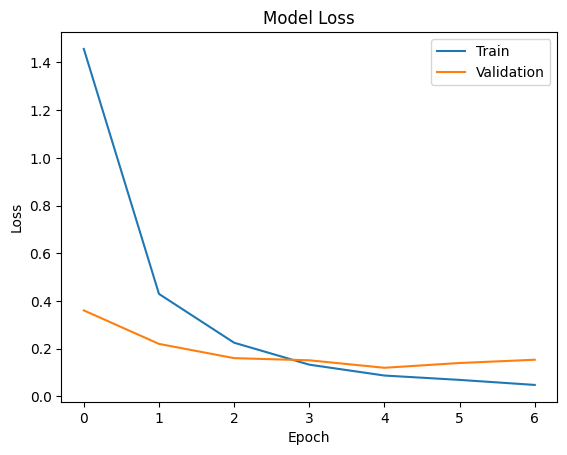

In [ ]:
#Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# 4. Visualize the result<a class="anchor" id="4"></a>

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

10/10 [==============================] - 32s 3s/step


In [ ]:
labels.items()

dict_items([(0, 'BR013'), (1, 'BR030'), (2, 'CR008'), (3, 'CR018'), (4, 'DR007'), (5, 'DR008'), (6, 'DR010'), (7, 'DR042'), (8, 'DR044'), (9, 'DR085'), (10, 'DR109'), (11, 'DR126'), (12, 'DR145'), (13, 'DR154'), (14, 'DR161'), (15, 'DR166'), (16, 'ER002'), (17, 'ER004'), (18, 'ER039'), (19, 'ER052'), (20, 'ER054'), (21, 'ER070'), (22, 'ER074'), (23, 'ER105'), (24, 'NR008'), (25, 'NR014'), (26, 'NR015'), (27, 'NR018')])

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 96.99%


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cf_matrix = confusion_matrix(y_test, pred, normalize='true')

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(15, 10))
sns.heatmap(cf_matrix,
            cmap="inferno",
            annot=True,
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test))
            )

# Set the title of the plot
plt.title('Normalized Confusion Matrix')

# Display the plot
plt.show()


In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.filepath.iloc[i]))
    ax.set_title(f"True: {test_df.label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

## 5. Class activation heatmap for image classification<a class="anchor" id="5"></a>
### Score CAM  class activation visualization
*Code adapted from keras.io*

In [ ]:
#Score
import matplotlib.cm as cm

# Function to load and preprocess the image array
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

# Preprocess input image
def preprocess_input(x):
    x /= 255.0
    x -= 0.5
    x *= 2.0
    return x

# Generate Score-CAM heatmap
def make_scorecam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the top predicted class for the input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Compute the gradients and pooled gradients
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap between 0 and 1
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

# Save and display the Score-CAM heatmap overlaid on the original image
def save_and_display_scorecam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale the heatmap to a range of 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use the jet colormap to colorize the heatmap
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with the colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on the original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    return cam_path

# Set the name of the last convolutional layer and the input image size
last_conv_layer_name = "Conv_1"
img_size = (224, 224)

# Remove the last layer's softmax activation
model.layers[-1].activation = None

<ipython-input-47-8240ffc1826d>:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


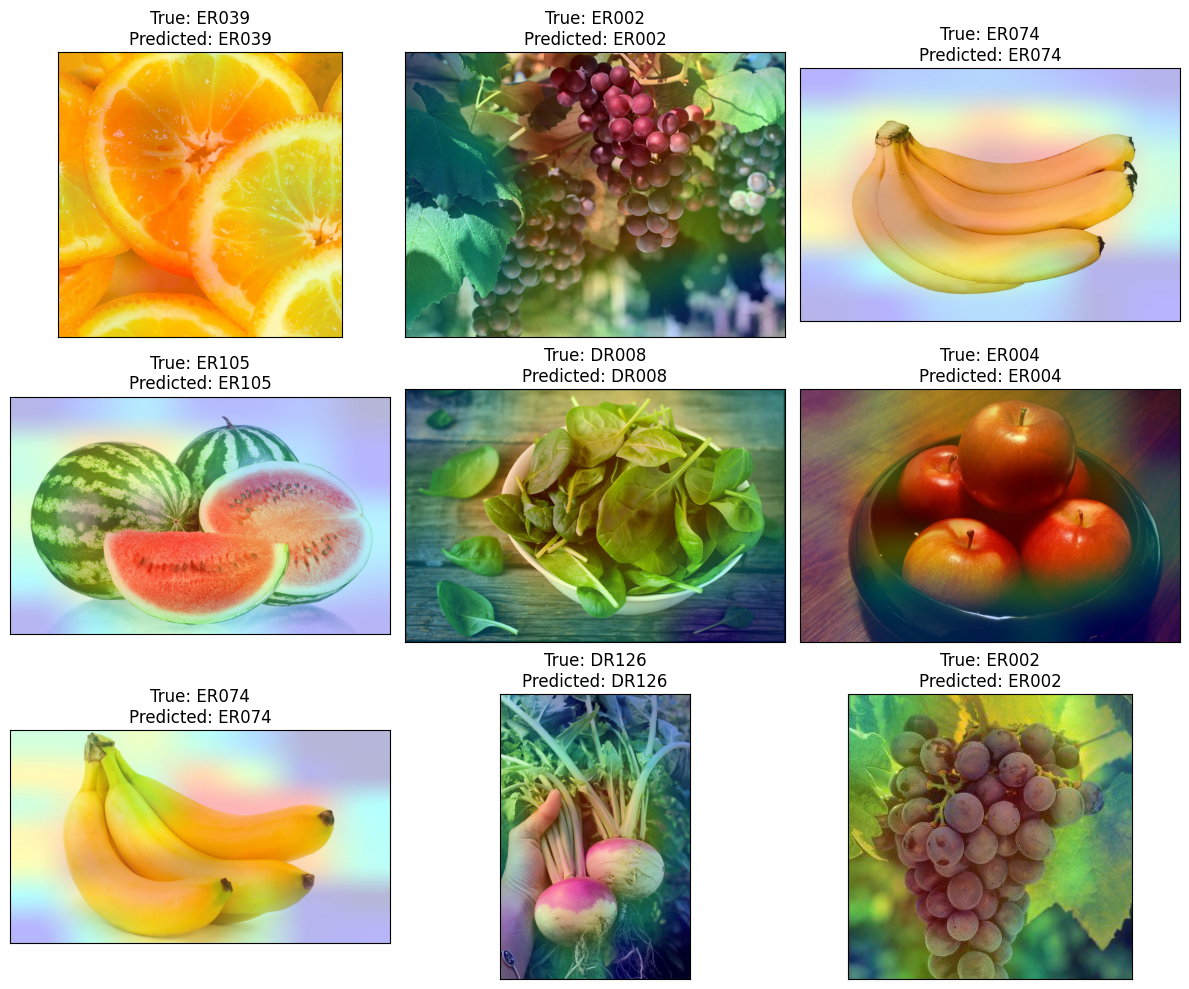

In [ ]:
# Display the part of the pictures used by the neural network to classify the pictures
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = test_df.filepath.iloc[i]
    img_array = preprocess_input(get_img_array(img_path, size=img_size))
    heatmap = make_scorecam_heatmap(img_array, model, last_conv_layer_name)
    cam_path = save_and_display_scorecam(img_path, heatmap)
    ax.imshow(plt.imread(cam_path))
    ax.set_title(f"True: {test_df.label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
def output(location):
    # Load and preprocess the image
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    img = load_img(location, target_size=(224, 224, 3))
    img = img_to_array(img)
    img = img / 255
    img = np.expand_dims(img, [0])
    
    # Make predictions using the model
    answer = model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    
    # Retrieve the corresponding label for the prediction
    res = labels[y]
    return res


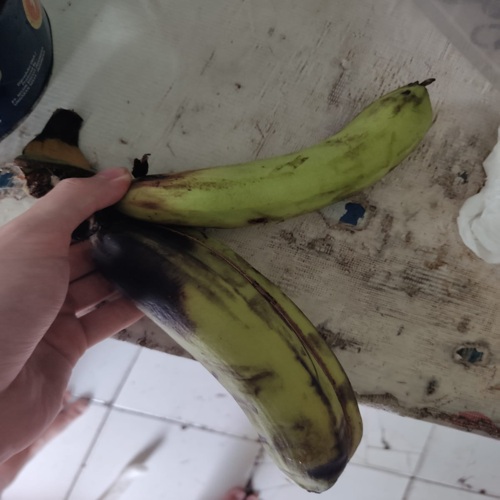

In [ ]:
from IPython.display import display
from PIL import Image

location = '/content/pisang.jpeg'
image = Image.open(location)
new_image = image.resize((500, 500))
display(new_image)

In [ ]:
img = output(location)
img

1/1 [==============================] - 1s 1s/step


'ER074'

In [ ]:
model.save('model_code.h5')